In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
np.random.seed(123)
tf.random.set_seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

from PIL import Image
import os
import cv2
import keras
from keras.utils import np_utils
from imblearn.over_sampling import SMOTE
from keras.preprocessing.image import ImageDataGenerator 
import tensorflow.keras.layers as Layers
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizers
import sklearn.utils as shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, LeakyReLU, BatchNormalization, Dropout, Input
import tensorflow as tf

# Load DATASET****

In [6]:
Images = []
Labels = []
train_data='/content/drive/MyDrive/C10_SP3/Statistics and Algorithms/Topic 17 - Deep Learning/DeployMLModelFlask/chest_xray/chest_xray/train'
test_data='/content/drive/MyDrive/C10_SP3/Statistics and Algorithms/Topic 17 - Deep Learning/DeployMLModelFlask/chest_xray/chest_xray/test'
val_data='/content/drive/MyDrive/C10_SP3/Statistics and Algorithms/Topic 17 - Deep Learning/DeployMLModelFlask/chest_xray/chest_xray/val'

In [8]:
Images = []
Labels = []
Parasitized = os.listdir("/content/drive/MyDrive/C10_SP3/Statistics and Algorithms/Topic 17 - Deep Learning/DeployMLModelFlask/chest_xray/val")
for p in Parasitized:
    try:
        image = cv2.imread("/content/drive/MyDrive/C10_SP3/Statistics and Algorithms/Topic 17 - Deep Learning/DeployMLModelFlask/chest_xray/val" + p)
        images = Image.fromarray(image, 'RGB')
        images = images.resize((150,150))
        Images.append(np.array(images))
        Labels.append(0)
    except AttributeError:
        print('')
Uninfected = os.listdir("/content/drive/MyDrive/C10_SP3/Statistics and Algorithms/Topic 17 - Deep Learning/DeployMLModelFlask/chest_xray/val/PNEUMONIA/")
for u in Uninfected:
    try:
        image = cv2.imread("/content/drive/MyDrive/C10_SP3/Statistics and Algorithms/Topic 17 - Deep Learning/DeployMLModelFlask/chest_xray/val/PNEUMONIA/" + u)
        images = Image.fromarray(image, 'RGB')
        images = images.resize((150,150))
        Images.append(np.array(images))
        Labels.append(1)
    except AttributeError:
        print('')


In [9]:
Images = np.array(Images)
Labels = np.array(Labels) 

In [10]:
print(Images.shape)
print(Labels.shape)

(8, 150, 150, 3)
(8,)


In [11]:
def show_images(image, label):
    fig = plt.figure(figsize = (10,10))
    fig.suptitle('20 Images from the dataset' ,fontsize = 20)
    for i in range(20):
        index = np.random.randint(Images.shape[0])
        plt.subplot(5,5,i+1)
        plt.imshow(image[index])
        plt.xticks([]) #Scale doesn't appear
        plt.yticks([]) #Scale doesn't apper
        plt.title((label[index]))
        plt.grid(False)
    plt.show()

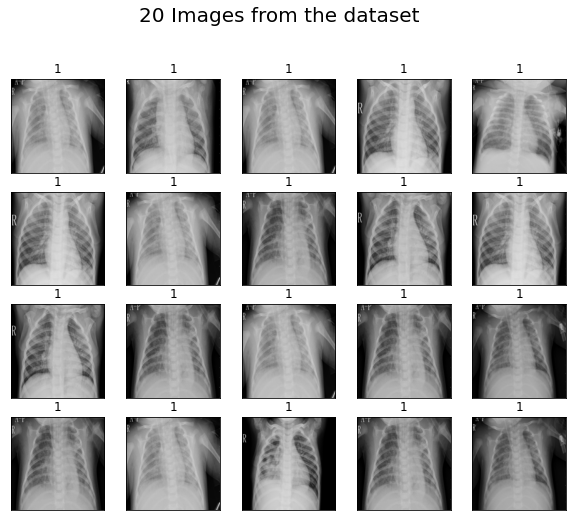

In [12]:
show_images(Images, Labels)

# Resize,transform,color of images

In [13]:
train_data=ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              rotation_range=5,
                              zoom_range=0.2,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              horizontal_flip=True,
                              vertical_flip=True
)

train=train_data.flow_from_directory('/content/drive/MyDrive/C10_SP3/Statistics and Algorithms/Topic 17 - Deep Learning/DeployMLModelFlask/chest_xray/val/',
                                     target_size=(300,300),
                                     batch_size=32,
                                     shuffle=True,
                                     seed=100,
                                     color_mode='grayscale',
                                     class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [14]:
test_data=ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              rotation_range=5,
                              zoom_range=0.2,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              horizontal_flip=True,
                              vertical_flip=True
)
test=test_data.flow_from_directory('/content/drive/MyDrive/C10_SP3/Statistics and Algorithms/Topic 17 - Deep Learning/DeployMLModelFlask/chest_xray/val',
                                target_size=(300,300),
                                batch_size=32,
                                shuffle=True,
                                seed=100,
                                color_mode='grayscale',
                                class_mode='binary')

Found 16 images belonging to 2 classes.


In [15]:
val_data=ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              rotation_range=5,
                              zoom_range=0.2,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              horizontal_flip=True,
                              vertical_flip=True
)
val=val_data.flow_from_directory('/content/drive/MyDrive/C10_SP3/Statistics and Algorithms/Topic 17 - Deep Learning/DeployMLModelFlask/chest_xray/val',
                                target_size=(300,300),
                                batch_size=32,
                                shuffle=True,
                                seed=100,
                                color_mode='grayscale',
                                class_mode='binary')

Found 16 images belonging to 2 classes.


NOT_Effected


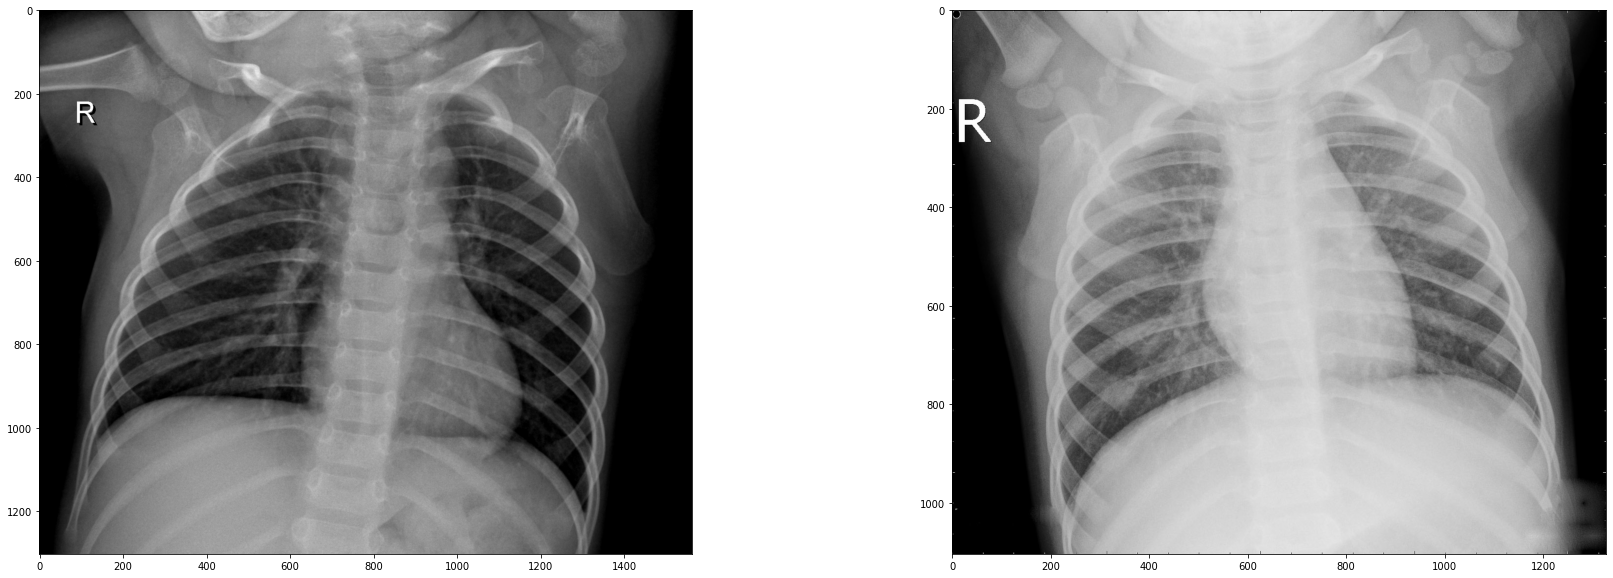

In [16]:
fig,(xy1,xy2)=plt.subplots(1,2,figsize=(30,10))
img_normal1=load_img('/content/drive/MyDrive/C10_SP3/Statistics and Algorithms/Topic 17 - Deep Learning/DeployMLModelFlask/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg')
img_normal2=load_img('/content/drive/MyDrive/C10_SP3/Statistics and Algorithms/Topic 17 - Deep Learning/DeployMLModelFlask/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg')
xy1.imshow(img_normal1)
xy2.imshow(img_normal2)
print('NOT_Effected')
plt.show()